## 0. Computer vision libraries in PyTorch

* torchvision - main framework in PyTorch to deal with computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that ypu can leverage for your own problems
* `torchvision.transforms` - functions for manipulating ypur vision data (images) to be suitable for use with an ML Model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# import torchvision 
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu117
0.15.1+cu117


## 1. Getting a dataset

The dataset that we'll be using is the fashion MNIST. Which is a modification of the original MNIST dataset.

In [2]:
# Set-up training data
train_data = datasets.FashionMNIST(
    root='data',  # where to download the data
    train=True, # do we want the training dataset
    download=True, #do we want to download it?
    transform=ToTensor(), # How do we want to transform the data
    target_transform=None # how do we want to tramsform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data',  # where to download the data
    train=False, # do we want the training dataset
    download=True, #do we want to download it?
    transform=ToTensor(), # How do we want to transform the data
    target_transform=None # how do we want to tramsform the labels/targets?
)



100%|██████████| 26421880/26421880 [00:01<00:00, 18996261.47it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 1034529.32it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 12879956.80it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15876674.26it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [12]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [5]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [16]:
print(f"The shape of the image is: {image.shape}, meaning Tensor(C, H, W)")
print(f"The class which that image belongs to is: {class_names[label]}")

The shape of the image is: torch.Size([1, 28, 28]), meaning Tensor(C, H, W)
The class which that image belongs to is: Ankle boot


### 1.2 Visualizing our data

Text(0.5, 1.0, 'Ankle boot')

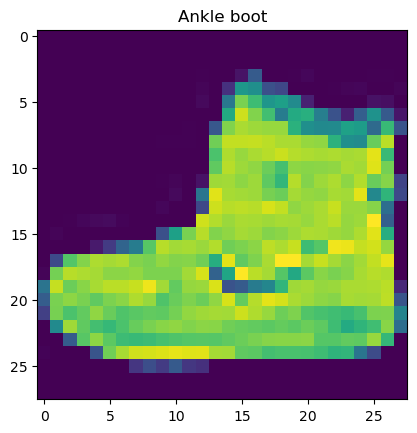

In [26]:
import matplotlib.pyplot as plt

image, label = train_data[0]
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

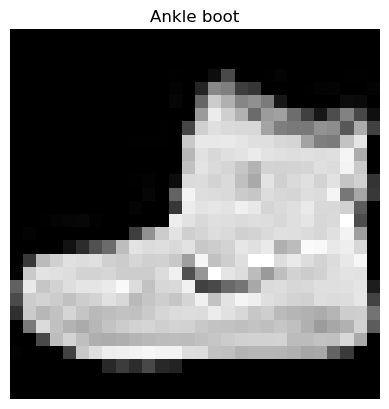

In [27]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

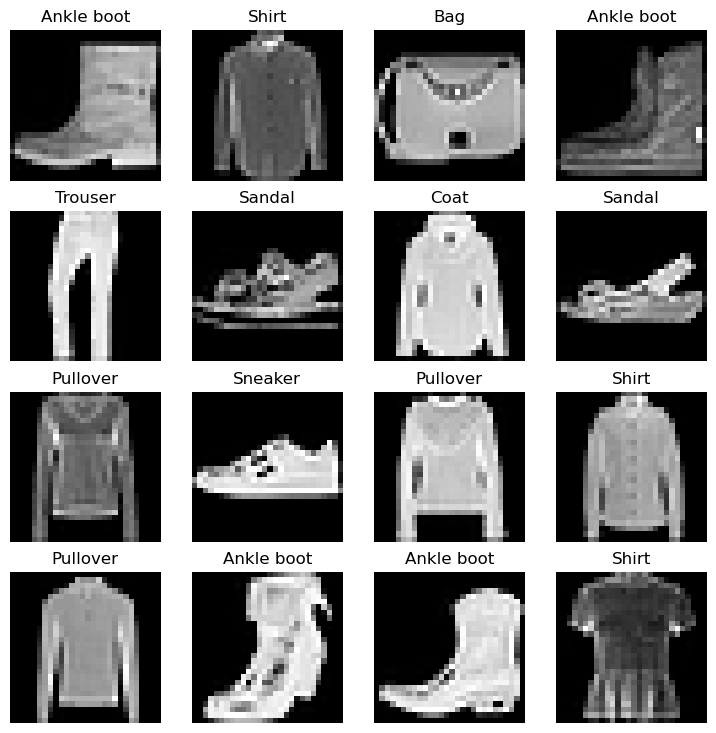

In [31]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

Do these items of clothing (images) could be modelled with pure lienar lines? Or we will need a non-linear model?

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch datasets
DataLoader turns our dataset into a Iterable
More specifically, we want to tur our data into batches (or mini-batches).
Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) 
at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradients per epoch.

In [32]:
from torch.utils.data import DataLoader

# Set-up batch size hyperparameter
BATCH_SIZE = 32
# Turn datasets into iterables (batches)

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f99cc21b850>,
 <torch.utils.data.dataloader.DataLoader at 0x7f99cc21b220>)

In [34]:
# Let's check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f99cc21b850>, <torch.utils.data.dataloader.DataLoader object at 0x7f99cc21b220>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [35]:
# Check-out what's inside of the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


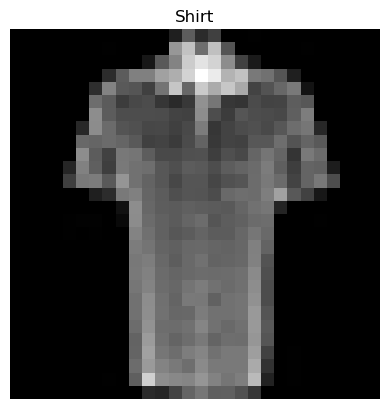

In [37]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try to improve upon subsequent model/experiments.

In other words: start simply and add complexity when necesary.

In [39]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a sim¡ngle sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shpae after the flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shpae after the flattening: torch.Size([1, 784])


In [40]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [41]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names) # One for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [42]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're wporking with multi-class data, our loss function will be `nn.CrossEntropyLoss()`.
* Optimizer - stochastic gradient descent `torch.optim.SGD()`.
* Evaluation metric - we are going to test using accuracy.

In [46]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creation a function to time our experiments

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy).
2. How fast it runs.

In [47]:
from timeit import default_timer as timer 
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

start_time = timer()


end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


1.1039999662898481e-05

### 3.3 Creating a training loop and training a model on batches on data

1. Loop trough epochs.
2. Loops through training batches, perform training steps, calculate the train loss *per_batch*.
3. Loop through testing batches, perform training steps, calculate the train loss *per_batch*.
4. Print out what's happening.
5. Time it all.

In [50]:
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs 
epochs = 3

# Create training and test loop 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    ### Training
    train_loss = 0
    # Add a loop to loop trough the training batches
    for batch, (X, y) in enumerate (train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)
        # Compute the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        #3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ## testing 
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)
            # 2. Compute the loss
            test_loss += loss_fn(test_pred, y_test)   
            # 3. Compute the accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) 

        # Divide total test loss by length of train dataloader
        test_loss /= len(test_dataloader)
        # Compute the test acc average per batch
        test_acc /= len(test_dataloader)

    print(f"Train Loss: {train_loss} | Test loss: {test_loss} | Test accuracy: {test_acc} %")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss: 0.4551703631877899 | Test loss: 0.4724770784378052 | Test accuracy: 83.39656549520767 %
Epoch: 1
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss: 0.4444226920604706 | Test loss: 0.46817225217819214 | Test accuracy: 83.74600638977635 %
Epoch: 2
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss: 0.4361402988433838 | Test loss: 0.4682518243789673 | Test accuracy: 83.73602236421725 %
Train time on cpu: 19.173 seconds


## 4. Make predictions and get Model 0 results

In [53]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting the data_loader."""
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc to find avg loss/acc
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4682518243789673,
 'model_acc': 83.73602236421725}

## 5. Set-up device agnostic-code (run the code in the GPU)

In [54]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Improving the model

In [170]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_dim: int, out_dim: int, hidden_units: int):
        super().__init__()
        self.stacked_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_dim, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_dim),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.stacked_layers(x)

### 6.1 Set-up loss and accuracy functions

In [171]:
model_1 = FashionMNISTModelV1(input_dim=28*28, 
                              out_dim=len(class_names), 
                              hidden_units = 10).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [172]:
X = next(iter(train_dataloader))
model_1(X[0][0].to(device)).argmax(dim=1)

tensor([3], device='cuda:0')

In [173]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

Let's create a function for:
* training loop -> `train_step()`
* testing loop: -> `testing_step()`

In [174]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training model with model trying to learn the data fed by the data loader"""

    model.train()
    ### Training
    train_loss, train_acc = 0, 0
    
    # Add a loop to loop trough the training batches
    for X, y in data_loader:
        model.train()
        # passing the data to the device
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model(X)
        # Compute the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        #3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train Loss: {train_loss:.5f} | Train acc {train_acc:.2f} %")

    

In [175]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device
              ):
    ## testing 
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            X, y = X_test.to(device), y_test.to(device)
            # 1. Forward pass
            test_pred = model(X)
            # 2. Compute the loss
            test_loss += loss_fn(test_pred, y)   
            # 3. Compute the accuracy
            test_acc += accuracy_fn(y_true=y, 
                                    y_pred=test_pred.argmax(dim=1)) 

        # Divide total test loss by length of train dataloader
        test_loss /= len(data_loader)
        # Compute the test acc average per batch
        test_acc /= len(data_loader)

        print(f"Test Loss: {test_loss:.5f} | Test acc {test_acc:.2f} %")

In [176]:
from tqdm.auto import tqdm
# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()
# set the number of epochs 
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------------")

    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_1,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
    

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                                end=train_time_end_on_cpu,
                                                device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------------
Train Loss: 1.48426 | Train acc 44.11 %
Test Loss: 1.23112 | Test acc 55.71 %
Epoch: 1
------------------
Train Loss: 1.10985 | Train acc 59.16 %
Test Loss: 1.11532 | Test acc 59.84 %
Epoch: 2
------------------
Train Loss: 1.07493 | Train acc 60.03 %
Test Loss: 1.10741 | Test acc 59.45 %
Train time on cuda:0: 26.300 seconds


**Note**: Sometimes, depending on your data/HW you might find that your model trains faster on CPU tan GPU.

Why is this?
1. It could be that the overhead for copying data/model to and from de GPU outweights the compute benefits offered by the GPU.
2. The CPU has more computing power than the GPU.

In [177]:
torch.manual_seed(42)
def eval_model_device(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
    """Returns a dictionary containing the results of model predicting the data_loader."""
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc to find avg loss/acc
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [178]:
model_1_results = eval_model_device(model=model_1,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 1.1074103116989136,
 'model_acc': 59.45487220447284}

In [179]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4682518243789673,
 'model_acc': 83.73602236421725}

## Model 2: Building a CNN

* Known for their known capabilities finding patterns in visual data

In [198]:
# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from the CNN Explainer Architecture
    """

    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=(3, 3),
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=(3, 3),
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=(3, 3),
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=(3, 3),
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        return self.classifier_layer(x)

In [199]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### 7.1 Stepping through `nn.Conv2d()`

In [200]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

# Create a Conv2D layer

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
            6.6224e-01, -2.3216e-01],
          [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
           -1.8552e-01, -5.7622e-01],
          [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
            1.4923e-01,  1.4236e-01],
          ...,
          [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
            4.2594e-01, -4.8341e-01],
          [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
           -3.6626e-01,  3.5645e-01],
          [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
           -4.9680e-01, -7.2258e-01]],

         [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
           -1.7643e+00,  2.5263e-01],
          [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
            4.8068e-01,  8.4869e-01],
          [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
            2.4611e-01,  6.6233e-01],
          ...,
     

### 7.2 Stepping through `nn.MaxPool2d()`

In [201]:
test_image.shape

torch.Size([3, 64, 64])

In [202]:
# Print put original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# CReate a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through max_pool_layer(): torch.Size([1, 10, 31, 31])


In [203]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimension to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor: \n {random_tensor}")
print(f"\nRandom tensor shape: \n {random_tensor.shape}")
# Create a max_pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax Pool tensor: \n {max_pool_tensor}")
print(f"\nMax Pool tensor shape: \n {max_pool_tensor.shape}")
random_tensor


Random tensor: 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape: 
 torch.Size([1, 1, 2, 2])

Max Pool tensor: 
 tensor([[[[0.3367]]]])

Max Pool tensor shape: 
 torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [204]:
random_image_tensor = torch.randn(size=(1, 28, 28))

model_2(random_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.3 Setup loss function and optimizer for CNN training

In [205]:
# Set-up loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our train and test functions

In [207]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as time
train_test_start_model2 = timer()

epochs = 3
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n--------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_test_end_model2 = timer()
print_train_time(start=train_test_start_model2,
                 end=train_test_end_model2,
                 device=str(next(model_1.parameters()).device))

Epoch: 0
--------
Train Loss: 0.32693 | Train acc 88.17 %
Test Loss: 0.32805 | Test acc 88.15 %
Epoch: 1
--------
Train Loss: 0.30703 | Train acc 88.80 %
Test Loss: 0.32108 | Test acc 88.30 %
Epoch: 2
--------
Train Loss: 0.29544 | Train acc 89.28 %
Test Loss: 0.31686 | Test acc 88.52 %
Train time on cuda:0: 31.997 seconds


31.997118615996442

In [210]:
model_2_results = eval_model_device(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3168569505214691,
 'model_acc': 88.51837060702876}

## 8. Compare model results in training time

In [212]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.468252,83.736022
1,FashionMNISTModelV1,1.107410,59.454872
2,FashionMNISTModelV2,0.316857,88.518371


## 9. Make and evaluate random predictions with best model

In [213]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            # Forward passs (model outputs logits)
            pred_logit = model(sample)
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            # Get pred_prob off the G^PU for further calculations
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [214]:
import random
random.seed(43)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Coat')

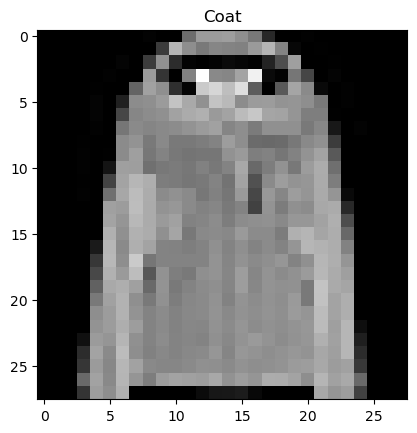

In [215]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [216]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View the first two probs
pred_probs[:2]

tensor([[2.3114e-04, 9.7539e-05, 4.9059e-03, 6.9711e-04, 9.9225e-01, 1.8036e-05,
         1.6274e-03, 6.8390e-06, 1.6587e-04, 3.4804e-06],
        [2.5821e-02, 3.5467e-04, 6.0400e-01, 6.1760e-03, 1.2677e-01, 5.2466e-04,
         2.2837e-01, 1.2628e-04, 7.7371e-03, 1.2329e-04]])

In [217]:
# Convert predictions probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 2, 0, 4, 5, 5, 0, 7, 5])

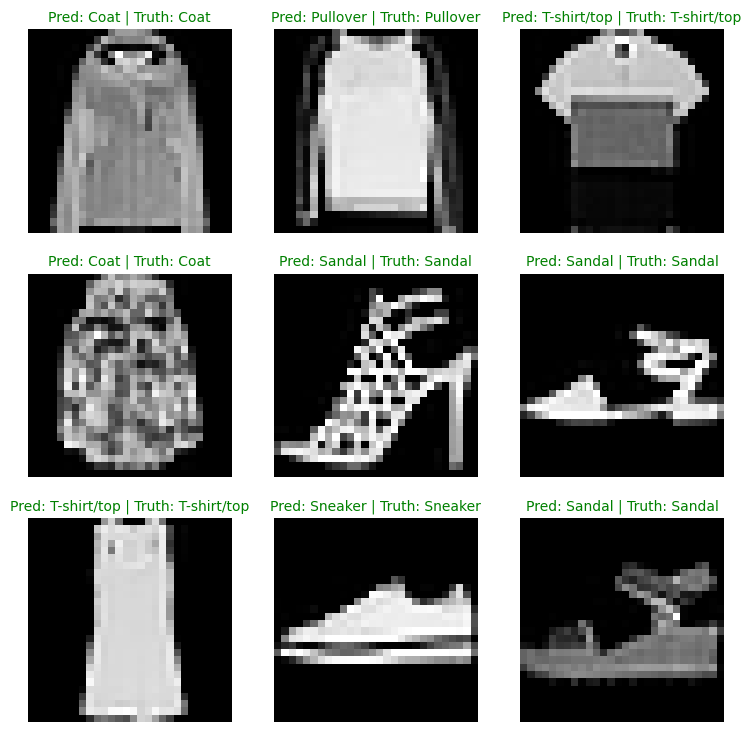

In [219]:
# Plot the predictions
plt.figure(figsize=(9,9))
n_rows = 3
n_cols = 3

for i, sample in enumerate(test_samples):
    # create subplot
    plt.subplot(n_rows, n_cols, i+1)

    # plot target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # find the prediction label in text form (i.e. "sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Crete a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # Color green if prediction matches truth
    else:
        plt.title(title_text, fontsize=10, c="r") # Color red if prediction do not match truth

    plt.axis(False)

## 10. making a confusion matrix for further prediction evaluation

1. Make predictions with our trained model onthe test dataset.
2. Make a confusion matrix `torchmetrics`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [224]:
import mlxtend
from tqdm.auto import tqdm
mlxtend.__version__

# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

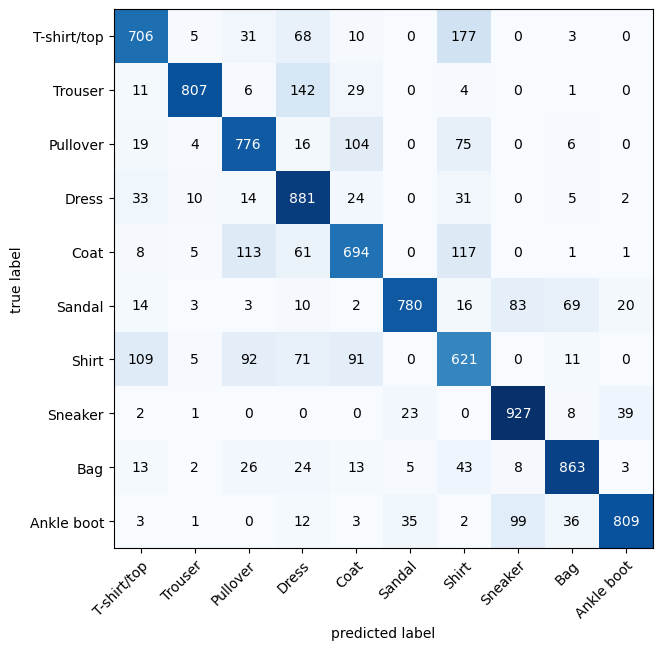

In [230]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes to work with numpy
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and load best performing model

In [231]:
from pathlib import Path

# Create models diretory
MODEL_PATH = Path("models")

MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create a model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [236]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1, # it is important the the shapes are the same as the saved model
                                     hidden_units=10,
                                     output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to to GPU
loaded_model_2 = loaded_model_2.to(device)

In [238]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model_device(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3168569505214691,
 'model_acc': 88.51837060702876}

In [239]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3168569505214691,
 'model_acc': 88.51837060702876}

In [240]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)